In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
from theano import shared
import pandas as pd
from matplotlib import gridspec
from sklearn.decomposition import PCA, KernelPCA
# from Plot_XZ import *
from PCA import *

In [2]:
plt.style.use('default')
font1 ={'family': 'times new roman', 'weight':'light', 'size': 12}  
# font2 ={'family': 'Arial', 'weight':'normal', 'size': 12}  
def Plot_XZ(elec_year, elec_faults, Savefig):
# 画出原始图
    Company_names = ['Xizang', 'Xinjiang', 'Heilongjiang']
    k = np.array([0, 41, 83])
    j= 0
    # j, k1 = 0, 6
    plt.figure(figsize=(4, 3), facecolor='w')

    ax = plt.subplot(1, 1, 1)
    for jx in range(7):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=4, linewidth=1)
        # j = j+k1
    ax.set_xticklabels(['2016', '2010', '2011', '2012', '2013', '2014', '2015'], fontsize='small')
    ax.set_xlabel("time(year)", fontdict=font1)
    plt.ylabel("Failure rate(%)", fontdict=font1)
    plt.legend([Company_names[0]], loc='upper left', frameon=False, fontsize='small')
#     plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\SCI\\Picture\\1.svg', format='svg')
    plt.show()
    plt.figure(figsize=(4, 3), facecolor='w')

    ax = plt.subplot(1, 1, 1)
    for jx in range(7, 14, 1):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=4, linewidth=1)
        # j = j+k1
    ax.set_xticklabels(['2016','2010', '2011', '2012', '2013', '2014', '2015'], fontsize='small')
    ax.set_xlabel("time(year)", fontdict=font1)
    plt.ylabel("Failure rate(%)", fontdict=font1)
    plt.legend([Company_names[1]], loc='upper left', frameon=False, fontsize='small')
#     plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\SCI\\Picture\\2.svg', format='svg')
    plt.show()
    
    plt.figure(figsize=(4, 3), facecolor='w')
    ax = plt.subplot(1, 1, 1)
    for jx in range(14, 21, 1):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=4, linewidth=1)
        # j = j+k1
    ax.set_xticklabels(['2016','2010', '2011', '2012', '2013', '2014', '2015'], fontsize='small')
    ax.set_xlabel("time(year)", fontdict=font1)
    plt.ylabel("Failure rate(%)", fontdict=font1)
    plt.legend([Company_names[2]], loc='upper left', frameon=False, fontsize='small')
#     leg = plt.legend()
#     leg.get_frame().set_linewidth(0.0)
    
#     plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\SCI\\Picture\\3.svg', format='svg')
    plt.show()
    return 0

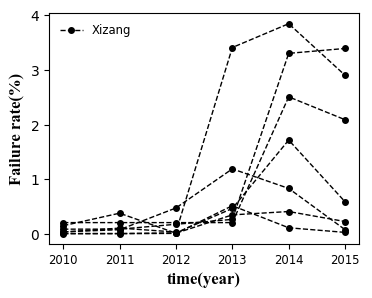

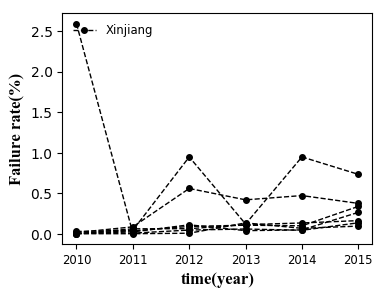

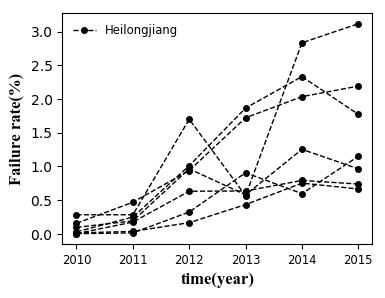

In [3]:
np.set_printoptions(precision=0, suppress=True)
Savefig = 0 # 控制图形显示存储

elec_data = pd.read_csv('XZmulti_6.csv')

# 计算同一公司产品测试地点数目：
companies_num = elec_data.counts.unique()
companies = len(companies_num)  # companies=7， 共7个测试地点
company_lookup = dict(zip(companies_num, range(len(companies_num))))
company = elec_data['company_code'] = elec_data.counts.replace(company_lookup).values  # 加一行数据在XZsingal文件中
# companys = elec_data.counts.values - 1 # 这一句以上面两行功能相同

# 计算不同公司数目
company_ABC = elec_data.company.unique()
companiesABC = len(company_ABC)  # companies=7， 共7个测试地点
company_lookup_ABC = dict(zip(company_ABC, range(len(company_ABC))))
companyABC = elec_data['company_ABC'] = elec_data.company.replace(company_lookup_ABC).values  # 加一行数据在XZsingal文件中
# companys = elec_data.counts.values - 1 # 这一句以上面两行功能相同
# elec_count = elec_data.counts.values

# 给所有特征因素加上高斯噪声
SNR = np.random.normal(0, 2, size=[len(elec_data.Year.values), 4])

# #特征因素分析
elec_tem = elec_data.Tem.values + SNR[:, 0] # 观测温度值x2
elec_tem1 = (elec_tem - np.mean(elec_tem)) / np.std(elec_tem)
elec_hPa = elec_data.hPa.values + SNR[:, 1]  # 观测压强x3
elec_hPa1 = (elec_hPa - np.mean(elec_hPa)) / np.std(elec_hPa)
elec_RH = elec_data.RH.values + SNR[:, 2] # 观测压强x3
elec_RH1 = (elec_RH - np.mean(elec_RH)) / np.std(elec_RH)
elec_Lux = elec_data.Lux.values + SNR[:, 3] # 观测压强x3
elec_Lux1 = (elec_Lux - np.mean(elec_Lux)) / np.std(elec_Lux)


# 计算观测时间，温度，光照等环境条件
elec_year = elec_data.Year.values  # 观测时间值x1
elec_year1 = (elec_year - np.mean(elec_year)) / np.std(elec_year)
data_cs_year = elec_year
# data_cs_year[42:45] = 12
# print(data_cs_year)

elec_Pca = np.vstack((elec_tem1, elec_hPa1, elec_RH1, elec_Lux1)).T   # 特征数据合并为一个数组
# elec_Pca2 = np.vstack((elec_tem, elec_hPa, elec_RH, elec_Lux)).T   # 特征数据合并为一个数组
# np.savetxt('XZ_nomean.csv', elec_Pca2, delimiter = ',')
# =============================================================================================
# # PCA特征降维，减少相关性，有两种方法，一种是自带函数，一种是网上程序，下面注释为网上程序
# x, z= pcaa(elec_Pca);  XX = np.array(x); ZZ = np.array(z)
# 将温度等4个特征降维变成2个特征，贡献率为99%以上，满足信息要求; 转换后的特征经过模型后能否还原
# =============================================================================================
# #白化，使得每个特征具有相同的方差，减少数据相关性，n_components：控制特征量个数
pca = PCA(n_components=2)
pca.fit(elec_Pca)
# 将数据X转换成降维后的数据。当模型训练好后，对于新输入的数据，都可以用transform方法来降维。
elec_Pca1 = pca.transform(elec_Pca)
elec_Pca1 = np.array(elec_Pca1)

# elec_Pca_char1 = elec_Pca1[:, 0] # 降维特征1
# elec_Pca_char2 = elec_Pca1[:, 1] # 降维特征2
elec_Pca_char1 = np.loadtxt('elec_Pca_char1.csv',delimiter = ',')
elec_Pca_char2 = np.loadtxt('elec_Pca_char2.csv',delimiter = ',')
# elec_Pca_char3 = elec_Pca1[:, 2] # 降维特征2
# print(elec_Pca_char1)
elec_data.Fault.values[48] =2000
# 计算故障率大小：故障数目/总测量数，作为模型Y值，放大100倍以增加实际效果，结果中要缩小100倍
elec_faults = 100 * (elec_data.Fault.values / elec_data.Nums.values)  # 数组形式,计算故障率大小
# elec_faults1 = (elec_faults - np.mean(elec_faults)) / np.std(elec_faults)
# elec_faults[25] = 3
# elec_faults[39] = 5
# elec_faults[53] = 3.8
# print(elec_faults)
# 将故障率以6组一行形式组成数组,变成：21*6
elec_faults2 = np.array([elec_faults[i*6:(i+1)*6] for i in np.arange(21)])
elec_year2 = np.array([elec_year[i*6:(i+1)*6] for i in np.arange(21)])
elec_char1 = np.array([elec_Pca_char1[i*6:(i+1)*6] for i in np.arange(21)])
elec_char2 = np.array([elec_Pca_char2[i*6:(i+1)*6] for i in np.arange(21)])
companyABC2 = np.array([companyABC[i*6:(i+1)*6] for i in np.arange(21)])

# 共享变量设置
xs_char1 = shared(np.asarray(elec_Pca_char1))
xs_char2 = shared(np.asarray(elec_Pca_char2))

ys_faults = shared(np.asarray(elec_faults))
xs_year = shared(np.asarray(data_cs_year))
Num_shared = shared(np.asarray(companyABC))
# 画图
Plot_XZ(elec_year2, elec_faults2, Savefig)

def logit(x):
    return 1/(1+np.exp(-x))
def tlogit(x):
    return 1/(1+tt.exp(-x))
def Phi(x):
    # probit transform
    return 0.5 + 0.5 * pm.math.erf(x/pm.math.sqrt(2))

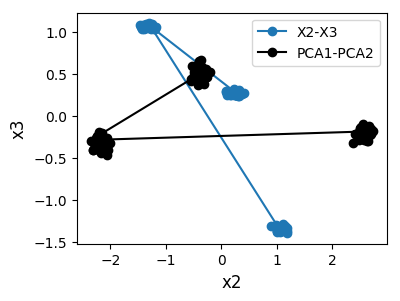

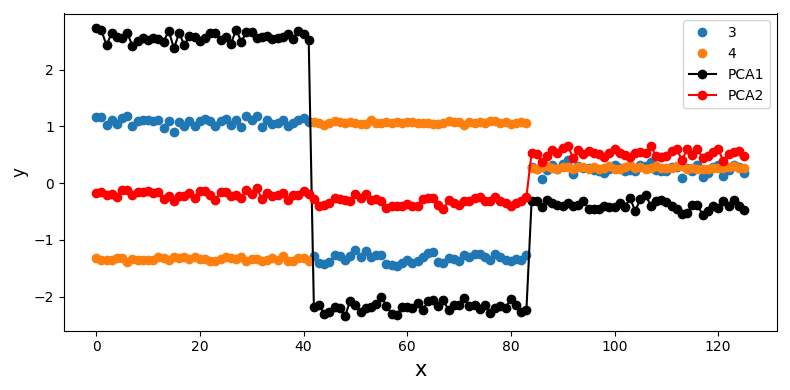

In [4]:
from matplotlib import gridspec
# 最后两个变量因素的主成分最大。故只画出最后两个的图
fig = plt.figure(figsize=(4, 3))
gs = gridspec.GridSpec(1, 2)
ip=1
# ax = plt.subplot(gs[ip])
ax = plt.subplot(1, 1, 1)
ax.plot(elec_Pca[:, 2],elec_Pca[:, 3],'o-')

ax.plot(elec_Pca1[:, 0], elec_Pca1[:, 1], 'ko-')
plt.legend([ 'X2-X3', 'PCA1-PCA2'], loc='upper right')
    
plt.xlabel('x2', fontsize=12)
plt.ylabel('x3', fontsize=12)
if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\SCI\\Picture\\corr.svg', format='svg')
plt.show()


fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(1, 1)
for ip in np.arange(1):
    ax = plt.subplot(gs[ip])
    for i in np.arange(2):
        ax.plot(elec_Pca[:, (i+2)],'o')

    ax.plot(elec_Pca1[:, ip], 'ko-')
    ax.plot(elec_Pca1[:, ip+1], 'ro-')
    plt.legend([ '3', '4', 'PCA1','PCA2'], loc='upper right')
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=12)
plt.tight_layout()
plt.show()

In [5]:
# 建模，模型
with pm.Model() as model_1:
    # define priors
    alpha = pm.HalfCauchy('alpha', 10, testval=.6)

    mu_4 = pm.Normal('mu_4', mu=0, tau=.001)
    sd_4 = pm.HalfCauchy('sd_4', 10)
    mu_3 = pm.Normal('mu_3', mu=0, tau=.001)
    sd_3 = pm.HalfCauchy('sd_3', 10)
    mu_2 = pm.Normal('mu_2', mu=0, tau=.001)
    sd_2 = pm.HalfCauchy('sd_2', 10)
    mu_1 = pm.Normal('mu_1', mu=0, tau=.001)
    sd_1 = pm.HalfCauchy('sd_1', 10)
#     mu_0 = pm.Normal('mu_0', mu=0, tau=.001)
#     sd = pm.InverseGamma('sd',3, 0.0001)
    beta4 = pm.Normal('beta4', mu_4, sd_4, shape=companiesABC)
    beta3 = pm.Normal('beta3', mu_3, sd_3, shape=companiesABC)
    beta2 = pm.Normal('beta2', mu_2, sd_2, shape=companiesABC)
    beta1 = pm.Normal('beta1', mu_1, sd_1, shape=companiesABC)
    beta = pm.Normal('beta', 0, 100)
    u = pm.Normal('u', 0, 0.01)

    beta_mu = pm.Deterministic('beta_mu', tt.exp(u + beta + \
                                             (beta1[Num_shared] * xs_year + beta2[Num_shared] * xs_char1 +\
                                              beta3[Num_shared] * xs_char2 + beta4[Num_shared] * xs_year * xs_year)))

    Observed = pm.Weibull("Observed", alpha=alpha, beta=beta_mu, observed=ys_faults)  # 观测值
    trace_1 = pm.sample(3000,  init='advi+adapt_diag' )

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 83.612:  15%|███████▌                                           | 29864/200000 [00:33<03:12, 885.29it/s]
Convergence archived at 29900
Interrupted at 29,899 [14%]: Average Loss = 5.5167e+78
100%|██████████████████████████████████████████████████████████████████████████████| 3500/3500 [01:37<00:00, 36.04it/s]D:\Softwares\Python\Python_Anaconda\lib\site-packages\pymc3\step_methods\hmc\nuts.py:467: UserWarning: Chain 0 contains 420 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))



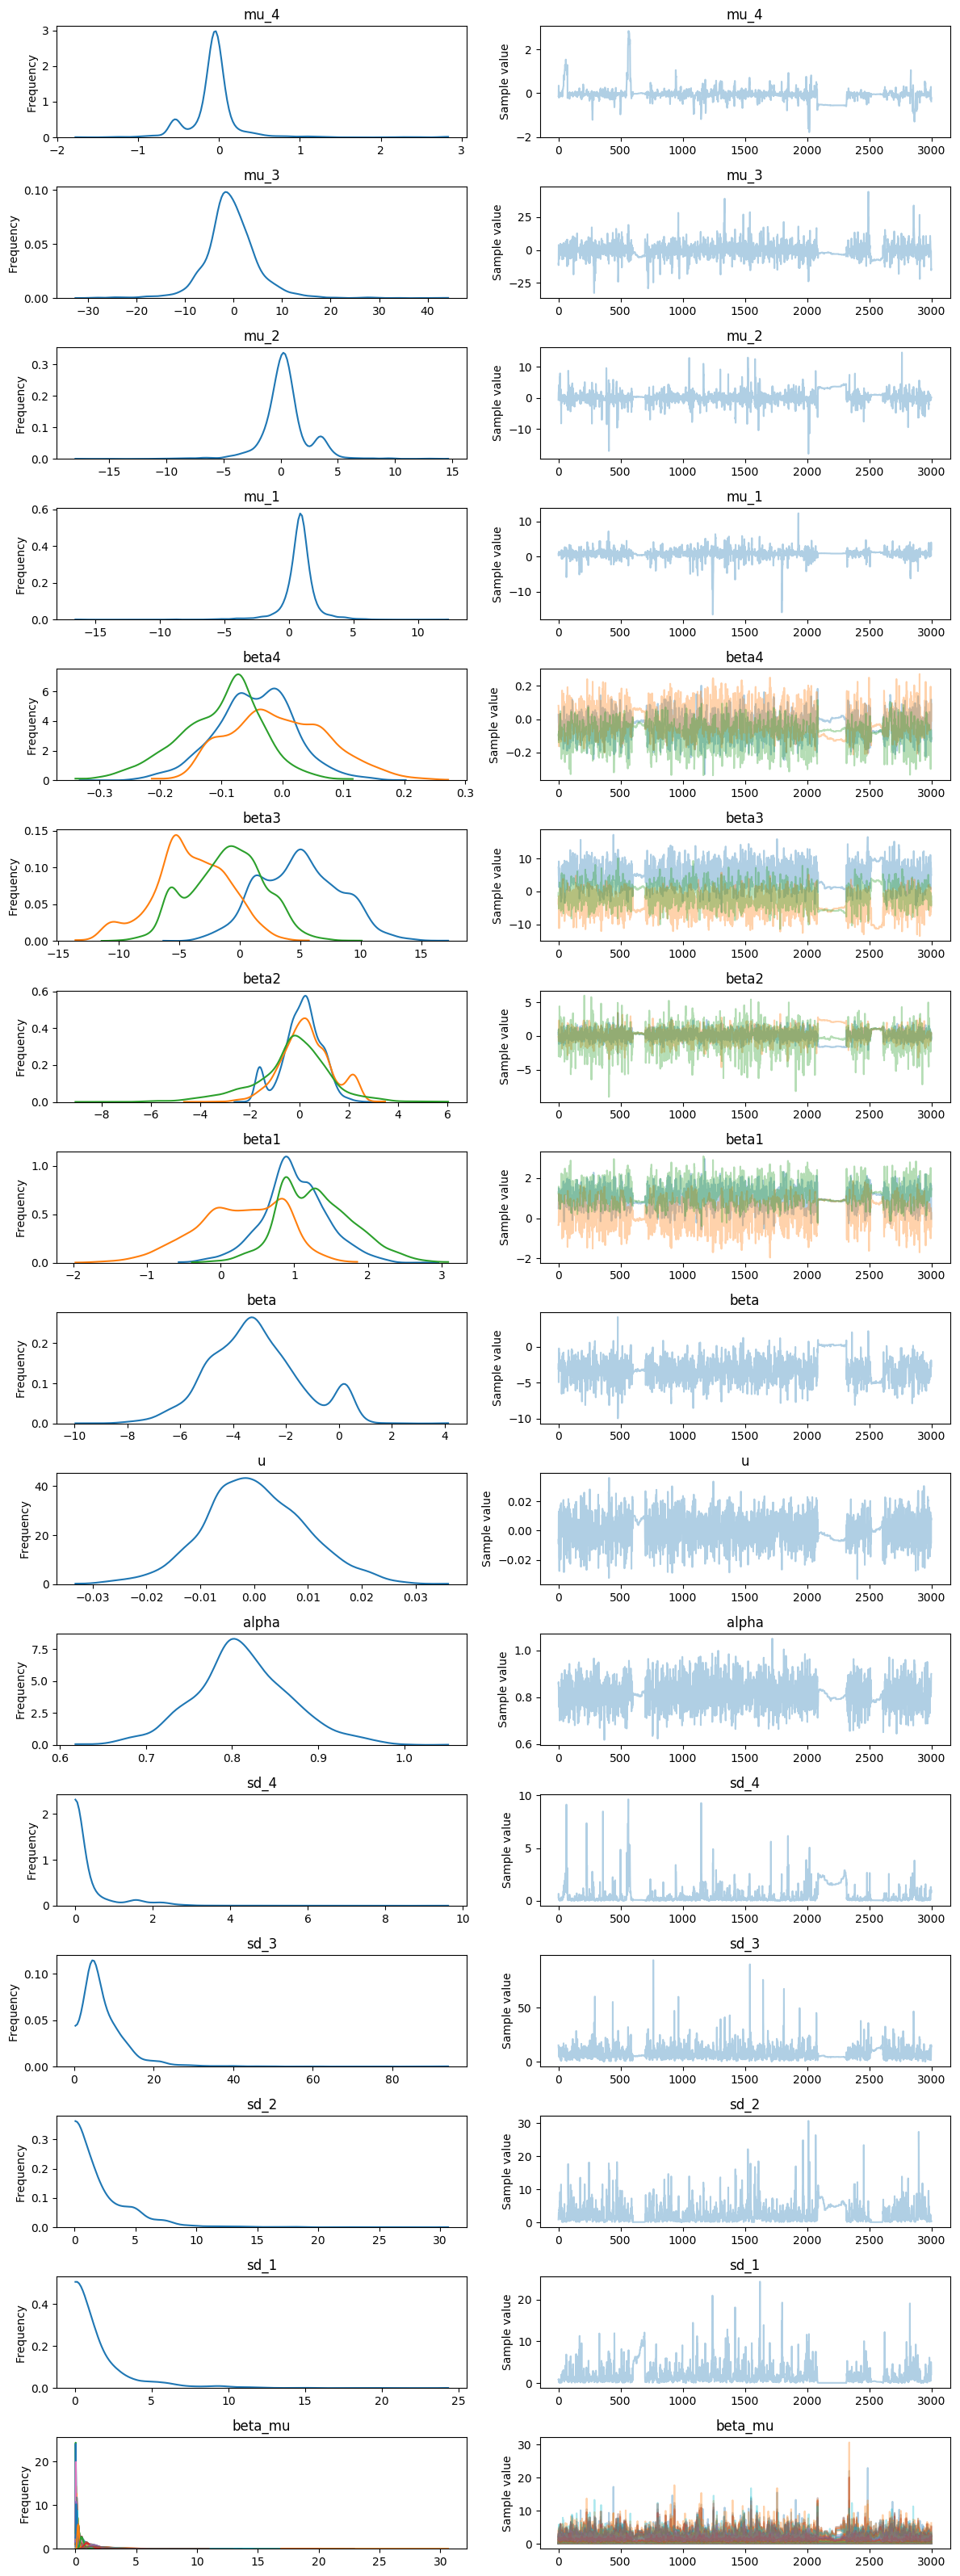

In [6]:
pm.traceplot(trace_1)
plt.show()

In [7]:
burnin = 2000
chain = trace_1[burnin:]
# get MAP estimate
varnames2 = ['beta', 'beta1', 'beta2', 'beta3','beta4', 'u']
tmp = pm.df_summary(chain, varnames2)
betaMAP = tmp['mean'][0]
beta1MAP = tmp['mean'][np.arange(companiesABC) + 1]
beta2MAP = tmp['mean'][np.arange(companiesABC) + 1*companiesABC+1]
beta3MAP = tmp['mean'][np.arange(companiesABC) + 2*companiesABC+1]
beta4MAP = tmp['mean'][np.arange(companiesABC) + 3*companiesABC+1]
uMAP = tmp['mean'][4*companiesABC+1]
print(uMAP)

-0.000646859724207


D:\Softwares\Python\Python_Anaconda\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
D:\Softwares\Python\Python_Anaconda\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


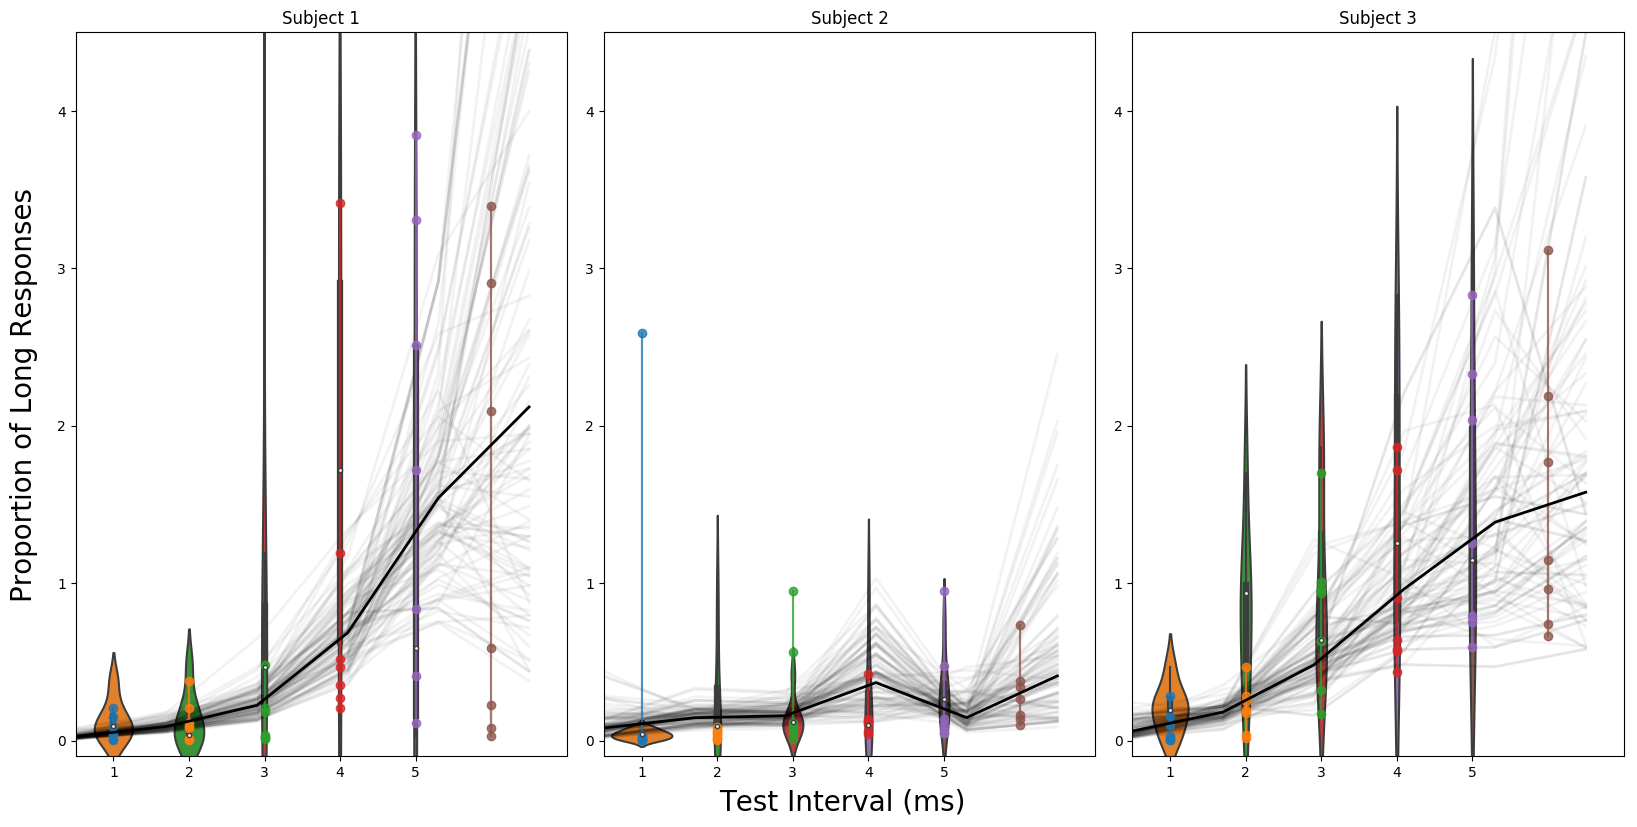

In [8]:
# 模型拟合效果图
ppcsamples = 500
ppcsize = 100
# ppc = defaultdict(list)
burnin = 2000
fig = plt.figure(figsize=(16, 8))
fig.text(0.5, -0.02, 'Test Interval (ms)', ha='center', fontsize=20)
fig.text(-0.02, 0.5, 'Proportion of Long Responses', va='center', rotation='vertical', fontsize=20)
gs = gridspec.GridSpec(1, 3)
ppcsamples = 100

for ip in np.arange(companiesABC):
    ax = plt.subplot(gs[ip])
    xp = elec_year2[ip*7:(ip+1)*7, :]
    yp = elec_faults2[ip*7:(ip+1)*7, :]
    

    xl = np.linspace(0.5, 6.5, 6)
    yl = np.exp(uMAP + betaMAP + (beta1MAP[ip]*xl + beta2MAP[ip]*elec_Pca_char1[ip*42:(ip*42+6)] + \
                beta3MAP[ip]*elec_Pca_char2[ip*42:(ip*42+6)] + beta4MAP[ip]*xl*xl))
    
    # Posterior sample from the trace
    for ips in np.random.randint(burnin, 3000, ppcsamples):
        param = trace_1[ips]
        yl2 = np.exp(param['u'] + param['beta'] + (param['beta1'][ip] * (xl) + \
                     param['beta2'][ip]*elec_Pca_char1[ip*42:(ip*42+6)] + \
                     param['beta3'][ip]*elec_Pca_char2[ip*42:(ip*42+6)] + \
                      + param['beta4'][ip] *xl*xl)
                    )
        ax.plot(xl, yl2, 'k', linewidth=2, alpha=.05)
    
    ax = sns.violinplot(data=elec_faults2[ip*7:(ip+1)*7])
    ax.plot(xp, yp, marker='o', alpha=.8)
    plt.plot(xl, yl, 'k', linewidth=2)
    plt.axis([0.5, 7, -.1, 4.5])
    plt.title('Subject %s' % (ip + 1))
    
plt.tight_layout()
plt.show()

100%|████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3851.94it/s]


[[  0.   0.]
 [  0.   1.]
 [  0.   1.]
 [  0.   3.]
 [  0.   5.]
 [  0.   8.]
 [  0.   0.]
 [  0.   1.]
 [  0.   1.]
 [  0.   2.]
 [  0.  11.]
 [  0.   7.]
 [  0.   0.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   6.]
 [  0.  10.]
 [  0.   0.]
 [  0.   1.]
 [  0.   1.]
 [  0.   6.]
 [  0.   4.]
 [  0.  11.]
 [  0.   0.]
 [  0.   1.]
 [  0.   3.]
 [  0.   2.]
 [  0.   3.]
 [  0.   7.]
 [  0.   0.]
 [  0.   0.]
 [  0.   1.]
 [  0.   2.]
 [  0.   4.]
 [  0.  10.]
 [  0.   0.]
 [  0.   1.]
 [  0.   1.]
 [  0.   3.]
 [  0.   6.]
 [  0.  12.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   2.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   0.]
 [  0.   1.]
 [  0.   1.]
 [  0.   2.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]
 [  0.   0.]
 [  0.   1.]
 [  0.   1.]
 [  0.   1.]

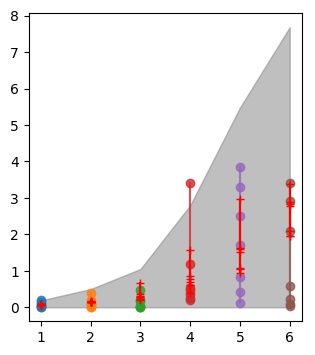

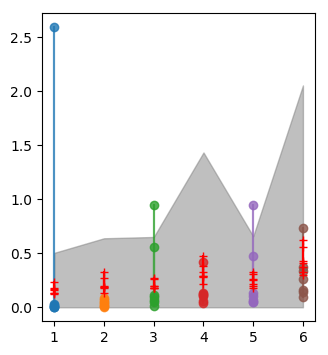

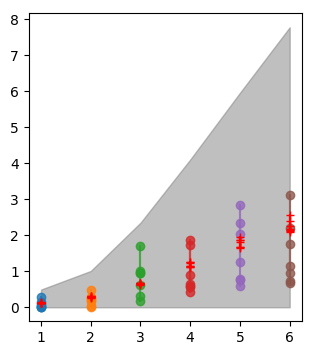

In [9]:
with model_1:
    ppcc1 = pm.sample_ppc(trace_1)
post_pred1 = ppcc1['Observed']
yipred_mean1 = post_pred1.mean(axis=0)
# print(yipred_mean)

# idx = np.linspace(1, 7, len(data_cs_year)) # 这句话要改
sig0 = pm.hpd(post_pred1, alpha=0.05)
# plt.fill_between(xp, sig0[:,0], sig01[:,1], color='gray', alpha=.8)  
print(sig0)
# 预测，此时这种格式是每行列数len(elec_faults)个，有很多行数据
xipred={}

fig = plt.figure(figsize=(12, 4))
# fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
ip = 0
ax = plt.subplot(gs[ip])
xp = elec_year2[ip * 7:(ip + 1) * 7, :]  # 原始数据
yp = elec_faults2[ip * 7:(ip + 1) * 7, :]
ax.plot(xp, yp, marker='o', alpha=.8)

plt.fill_between(xp[0], sig0[:6,0], sig0[:6,1], color='gray', alpha=.5) 

yipred_yplot = np.array([yipred_mean1[i*6:(i+1)*6] for i in np.arange(7*ip, (ip+1)*7)])
xipred = np.array([np.arange(6)+1 for i in np.arange(7)])
ax.plot(xipred, yipred_yplot[:], 'k+-', color='r')  
plt.show()


fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 1, 1)
ip = 1
ax = plt.subplot(gs[ip])
xp = elec_year2[ip * 7:(ip + 1) * 7, :]  # 原始数据
yp = elec_faults2[ip * 7:(ip + 1) * 7, :]
ax.plot(xp, yp, marker='o', alpha=.8)

plt.fill_between(xp[0], sig0[42:48,0], sig0[42:48,1], color='gray', alpha=.5) 

yipred_yplot = np.array([yipred_mean1[i*6:(i+1)*6] for i in np.arange(7*ip, (ip+1)*7)])
xipred = np.array([np.arange(6)+1 for i in np.arange(7)])
ax.plot(xipred, yipred_yplot[:], 'k+-', color='r') 
plt.show()


fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 1, 1)
ip = 2
ax = plt.subplot(gs[ip])
xp = elec_year2[ip * 7:(ip + 1) * 7, :]  # 原始数据
yp = elec_faults2[ip * 7:(ip + 1) * 7, :]
ax.plot(xp, yp, marker='o', alpha=.8)

plt.fill_between(xp[0], sig0[84:90,0], sig0[84:90,1], color='gray', alpha=.5)  

yipred_yplot = np.array([yipred_mean1[i*6:(i+1)*6] for i in np.arange(7*ip, (ip+1)*7)])
xipred = np.array([np.arange(6)+1 for i in np.arange(7)])
ax.plot(xipred, yipred_yplot[:], 'k+-', color='r')
    
plt.show()

In [10]:
# 建模，加上含污染模型对比
with pm.Model() as model_2:
    # define priors
    sdsd = 3
    alpha = pm.HalfCauchy('alpha', 10, testval=.6)

    mu_4 = pm.Normal('mu_4', mu=0, tau=.001)
    sd_4 = pm.HalfCauchy('sd_4', sdsd)
    mu_3 = pm.Normal('mu_3', mu=0, tau=.001)
    sd_3 = pm.HalfCauchy('sd_3', sdsd)
    mu_2 = pm.Normal('mu_2', mu=0, tau=.001)
    sd_2 = pm.HalfCauchy('sd_2', sdsd)
    mu_1 = pm.Normal('mu_1', mu=0, tau=.001)
    sd_1 = pm.HalfCauchy('sd_1', sdsd)
#     mu_0 = pm.Normal('mu_0', mu=0, tau=.001)
#     sd_0 = pm.HalfCauchy('sd_0', 20)
#     sd = pm.InverseGamma('sd',3, 0.0001)
    beta4 = pm.Normal('beta4', mu_4, sd_4, shape=companiesABC)
    beta3 = pm.Normal('beta3', mu_3, sd_3, shape=companiesABC)
    beta2 = pm.Normal('beta2', mu_2, sd_2, shape=companiesABC)
    beta1 = pm.Normal('beta1', mu_1, sd_1, shape=companiesABC)
    beta = pm.Normal('beta', 0, 100)
    u = pm.Normal('u', 0, 0.01)

    liner = pm.Deterministic('liner', tt.exp(u + beta + \
                                             (beta1[Num_shared] * xs_year + beta2[Num_shared] * xs_char1 +\
                                              beta3[Num_shared] * xs_char2 + beta4[Num_shared] * xs_year * xs_year)))

    # latent model for contamination
#     upper = pm.HalfCauchy('upper', 10)
    sigma_p = pm.HalfCauchy('sigma_p', sdsd)
    mu_p = pm.Normal('mu_p', mu=0, tau=.001)

    probitphi = pm.Normal('probitphi', mu=mu_p, sd=sigma_p, shape=companiesABC, testval=np.ones(companiesABC))
    phii = pm.Deterministic('phii', Phi(probitphi))
    
    pi_ij = pm.Uniform('pi_ij', lower=0, upper=1, shape=len(Num_shared.get_value()))
    
    zij_ = pm.theanof.tt_rng().uniform(size=companyABC.shape)
    zij = pm.Deterministic('zij', tt.lt(zij_, phii[Num_shared]))   

    beta_mu = pm.Deterministic('beta_mu', tt.switch(zij, liner, pi_ij))
    
    Observed = pm.Weibull("Observed", alpha=alpha, beta=beta_mu, observed=ys_faults)  # 观测值

import theano
with model_2:
    s = theano.shared(pm.floatX(1))
    inference = pm.ADVI(cost_part_grad_scale=s)
    # ADVI has nearly converged
    inference.fit(n=20000)
    # It is time to set `s` to zero
    s.set_value(0)
    approx = inference.fit(n=10000)
    trace_2 = approx.sample(3000, include_transformed=True)
    elbos1 = -inference.hist

Average Loss = 153.16: 100%|████████████████████████████████████████████████████| 20000/20000 [00:28<00:00, 690.28it/s]
Finished [100%]: Average Loss = 153.16
Average Loss = 102.38: 100%|███████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1019.68it/s]
Finished [100%]: Average Loss = 102.41


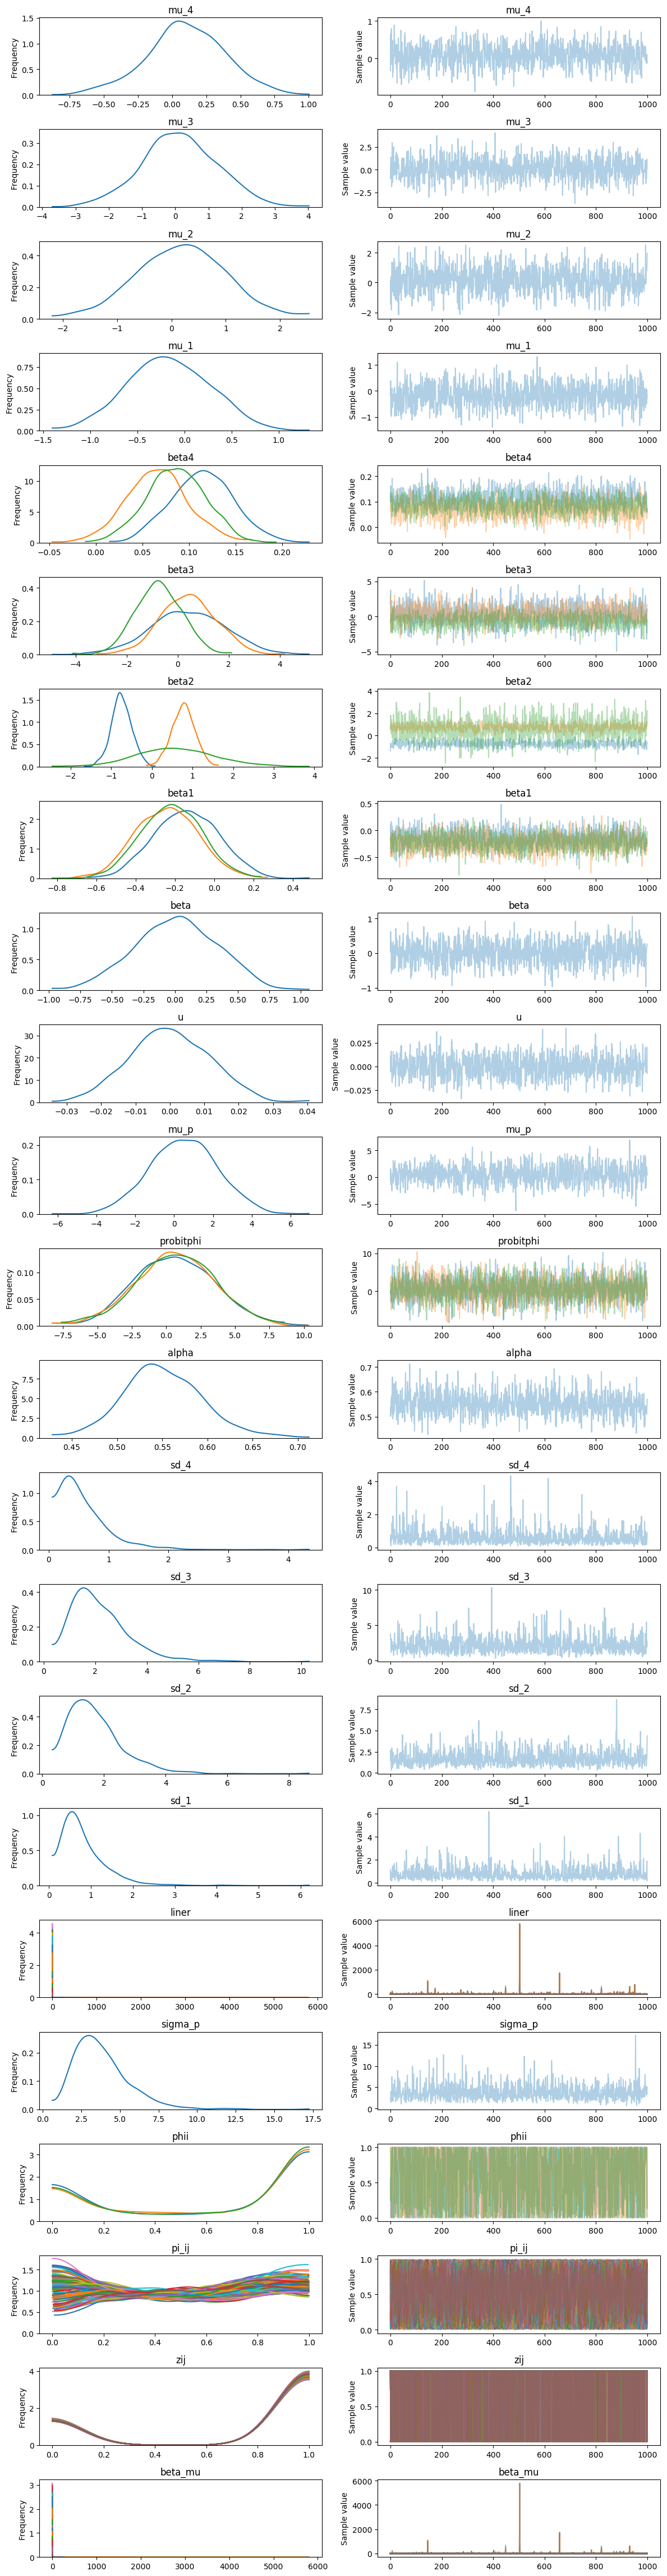

In [11]:
chain_2 = trace_2[2000:]
# varnames2 = ['beta', 'beta1', 'beta2', 'beta3', 'u', 'beta4']
pm.traceplot(chain_2)
plt.show()

In [12]:
njob = 1
start = trace_2[0]
start['zij'] = start['zij'].astype(int)
stds = approx.bij.rmap(approx.std.eval())
cov = model_2.dict_to_array(stds) ** 2
# 建模，加上含污染模型对比
with pm.Model() as model_2b:
    # define priors
    sdsd = 3
    alpha = pm.HalfCauchy('alpha', 10, testval=.6)

    mu_4 = pm.Normal('mu_4', mu=0, tau=.001)
    sd_4 = pm.HalfCauchy('sd_4', sdsd)
    mu_3 = pm.Normal('mu_3', mu=0, tau=.001)
    sd_3 = pm.HalfCauchy('sd_3', sdsd)
    mu_2 = pm.Normal('mu_2', mu=0, tau=.001)
    sd_2 = pm.HalfCauchy('sd_2', sdsd)
    mu_1 = pm.Normal('mu_1', mu=0, tau=.001)
    sd_1 = pm.HalfCauchy('sd_1', sdsd)
    #     mu_0 = pm.Normal('mu_0', mu=0, tau=.001)
    #     sd_0 = pm.HalfCauchy('sd_0', 20)
    beta4 = pm.Normal('beta4', mu_4, sd_4, shape=companiesABC)
    beta3 = pm.Normal('beta3', mu_3, sd_3, shape=companiesABC)
    beta2 = pm.Normal('beta2', mu_2, sd_2, shape=companiesABC)
    beta1 = pm.Normal('beta1', mu_1, sd_1, shape=companiesABC)
    beta = pm.Normal('beta', 0, 100)
    u = pm.Normal('u', 0, 0.01)

    liner = pm.Deterministic('liner', tt.exp(u + beta + \
                                             (beta1[Num_shared] * xs_year + beta2[Num_shared] * xs_char1 + \
                                              beta3[Num_shared] * xs_char2 + beta4[Num_shared] * xs_year * xs_year)))

    pi_ij = pm.Uniform('pi_ij', lower=0, upper=1, shape=len(Num_shared.get_value()))

    # latent model for contamination
    sigma_p = pm.HalfCauchy('sigma_p', sdsd)
    mu_p = pm.Normal('mu_p', mu=0, tau=.001)

    probitphi = pm.Normal('probitphi', mu=mu_p, sd=sigma_p, shape=companiesABC, testval=np.ones(companiesABC))
    phii = pm.Deterministic('phii', Phi(probitphi))

    zij = pm.Bernoulli('zij', p=phii[Num_shared], shape=len(Num_shared.get_value()))

    beta_mu = pm.Deterministic('beta_mu', tt.switch(tt.eq(zij, 0), liner, pi_ij))

    Observed = pm.Weibull("Observed", alpha=alpha, beta=beta_mu, observed=ys_faults)  # 观测值

    #     step1 = pm.Metropolis([zij])
    step = pm.NUTS(scaling=cov, is_cov=True)
    trace_2b = pm.sample(3000, step=[step], start=start, njobs=njob, turn=500)

Assigned BinaryGibbsMetropolis to zij
100%|█████████████████████████████████████████████████████████████████████████████▉| 3499/3500 [03:35<00:00, 16.20it/s]D:\Softwares\Python\Python_Anaconda\lib\site-packages\pymc3\step_methods\hmc\nuts.py:467: UserWarning: Chain 0 contains 454 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████████████████████████████████████████████████████████████████████████| 3500/3500 [03:36<00:00, 16.20it/s]


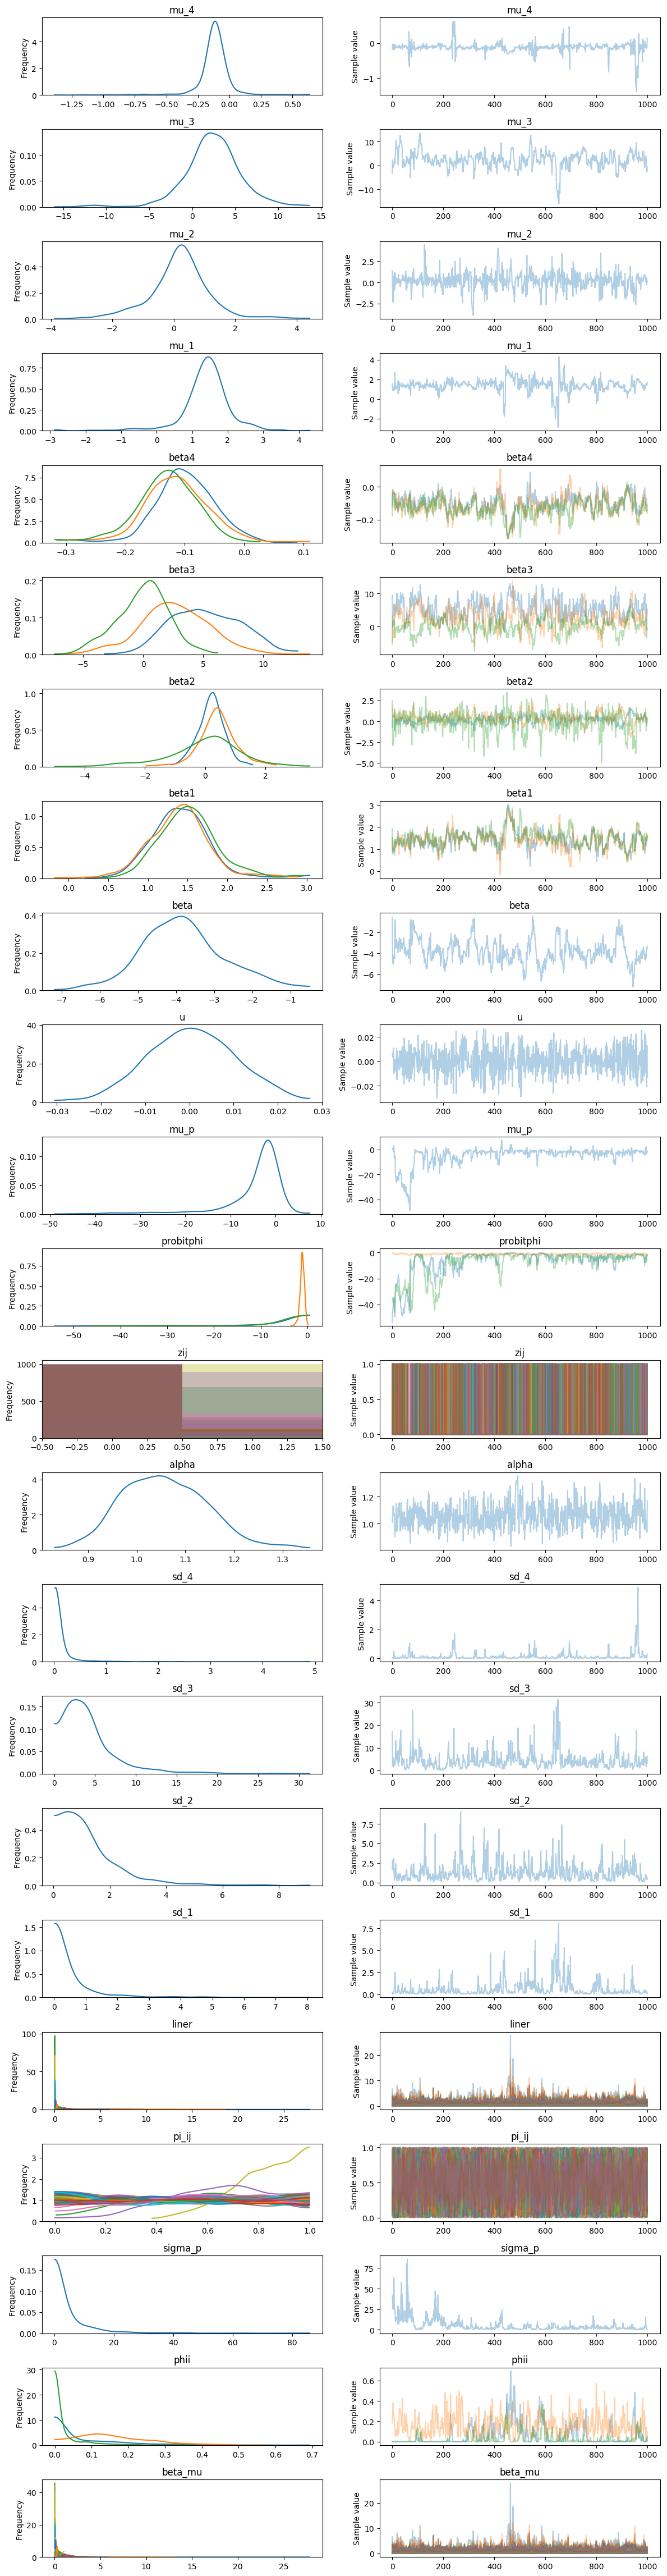

In [13]:
chain_2b = trace_2b[2000:]
# varnames2 = ['beta', 'beta1', 'beta2', 'beta3', 'u', 'beta4']
pm.traceplot(chain_2b)
plt.show()

In [14]:
varnames2b = ['beta', 'beta1', 'beta2', 'beta3','beta4', 'u']
tmp2 = pm.df_summary(chain_2b, varnames2b)
betaMAP2 = tmp2['mean'][0]
beta1MAP2 = tmp2['mean'][np.arange(companiesABC) + 1]
beta2MAP2 = tmp2['mean'][np.arange(companiesABC) + 1*companiesABC+1]
beta3MAP2 = tmp2['mean'][np.arange(companiesABC) + 2*companiesABC+1]
beta4MAP2 = tmp2['mean'][np.arange(companiesABC) + 3*companiesABC+1]
uMAP2 = tmp2['mean'][4*companiesABC+1]
# am0MAP = tmp['mean'][4*companiesABC+2]
# am1MAP = tmp['mean'][4*companiesABC+3]
print(tmp2)
# np.savetxt('summary3.csv',tmp2 , delimiter=',')

              mean        sd  mc_error   hpd_2.5   hpd_97.5
beta     -3.804963  1.104546  0.094965 -5.726204  -1.259065
beta1__0  1.411077  0.377240  0.032555  0.630828   2.049660
beta1__1  1.392655  0.396026  0.031871  0.460338   2.127058
beta1__2  1.514525  0.378865  0.032413  0.794371   2.303147
beta2__0  0.198923  0.434677  0.034293 -0.812015   0.943304
beta2__1  0.403959  0.609965  0.048574 -0.800942   1.778979
beta2__2 -0.036039  1.190222  0.077255 -3.126376   1.906057
beta3__0  5.243161  2.895165  0.204183  0.215762  10.553858
beta3__1  2.649003  2.921262  0.224193 -3.001326   8.827132
beta3__2 -0.075134  2.155231  0.181264 -4.515632   4.043487
beta4__0 -0.101042  0.051962  0.004310 -0.183121   0.011945
beta4__1 -0.115577  0.057535  0.004615 -0.226343   0.007185
beta4__2 -0.131391  0.052012  0.004383 -0.243047  -0.036134
u         0.000439  0.009973  0.000321 -0.017966   0.020350


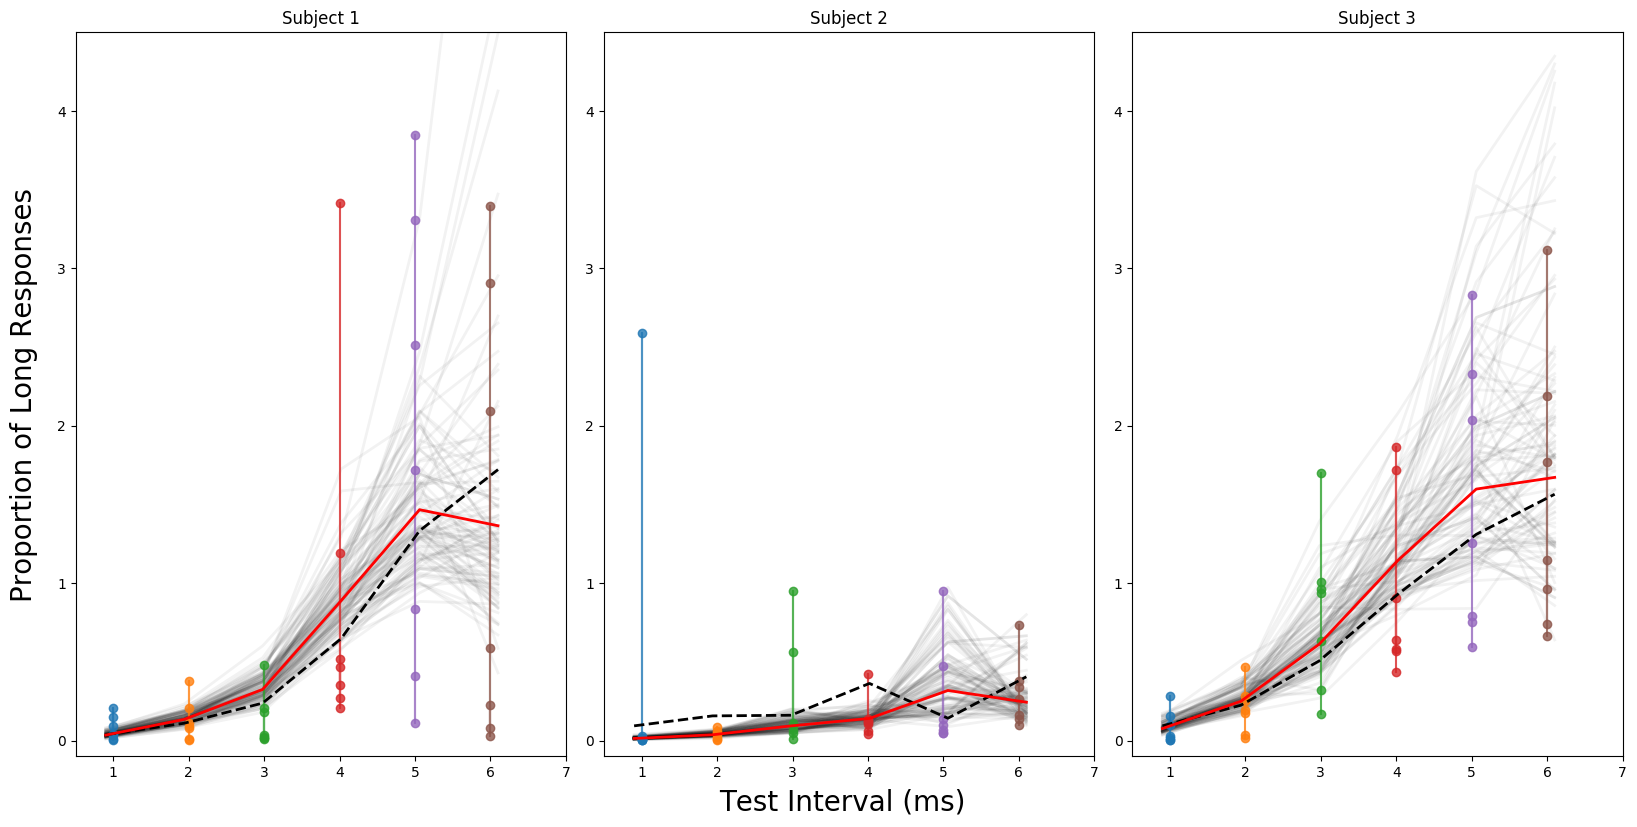

In [15]:
# 模型拟合效果图
ppcsamples = 500
ppcsize = 100
# ppc = defaultdict(list)
burnin = 2000
fig = plt.figure(figsize=(16, 8))
fig.text(0.5, -0.02, 'Test Interval (ms)', ha='center', fontsize=20)
fig.text(-0.02, 0.5, 'Proportion of Long Responses', va='center', rotation='vertical', fontsize=20)
gs = gridspec.GridSpec(1, 3)
ppcsamples = 100

for ip in np.arange(companiesABC):
    ax = plt.subplot(gs[ip])
    xp = elec_year2[ip*7:(ip+1)*7, :]
    yp = elec_faults2[ip*7:(ip+1)*7, :]
    

    xl = np.linspace(0.9, 6.1, 6)
    yl = np.exp(uMAP + betaMAP + (beta1MAP[ip]*xl + beta2MAP[ip]*elec_Pca_char1[ip*42:(ip*42+6)] + \
                beta3MAP[ip]*elec_Pca_char2[ip*42:(ip*42+6)] + beta4MAP[ip]*xl*xl))
    
    y2 = np.exp(uMAP2 + betaMAP2 + (beta1MAP2[ip]*xl + beta2MAP2[ip]*elec_Pca_char1[ip*42:(ip*42+6)] + \
                beta3MAP2[ip]*elec_Pca_char2[ip*42:(ip*42+6)] + beta4MAP2[ip]*xl*xl))   
    # Posterior sample from the trace
    for ips in np.random.randint(burnin, 3000, ppcsamples):
        param = trace_2b[ips]
        yl2 = np.exp(param['u'] + param['beta'] + (param['beta1'][ip] * (xl) + \
                     param['beta2'][ip]*elec_Pca_char1[ip*42:(ip*42+6)] + \
                     param['beta3'][ip]*elec_Pca_char2[ip*42:(ip*42+6)] + \
                      + param['beta4'][ip] *xl*xl)
                    )
        ax.plot(xl, yl2, 'k', linewidth=2, alpha=.05)
    
#     ax = sns.violinplot(data=elec_faults2[ip*7:(ip+1)*7])
    ax.plot(xp, yp, marker='o', alpha=.8)
    plt.plot(xl, yl, 'k--', linewidth=2)
    plt.plot(xl, y2,  'r', linewidth=2)
    plt.axis([0.5, 7, -.1, 4.5])
    plt.title('Subject %s' % (ip + 1))
    
plt.tight_layout()
plt.show()

In [16]:
WAIC = pm.compare([trace_1, trace_2b], [model_1, model_2b], ic='WAIC')
print(WAIC)

    WAIC  pWAIC  dWAIC weight     SE    dSE warning
1 -30.96  18.86      0      1  37.21      0       1
0  24.73  15.59  55.68      0  42.58  18.41       1


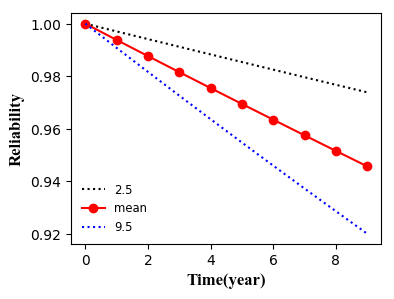

In [17]:
# 可靠度计算，beta_mu要除以100还原
post_alpha1 = np.mean(chain_2b['alpha'])
post_beta_mu1 = np.mean(chain_2b['beta_mu'])/100

varnames1 = ['alpha', 'beta_mu']
aaa1 = pm.df_summary(trace_2b, varnames1)
bbb1 = pd.DataFrame(aaa1)

hpdd2_5 = bbb1['hpd_2.5']
hpdd97_5 = bbb1['hpd_97.5']
hpd2_5_alpha = hpdd2_5[:1].mean()
hpd97_5_alpha = hpdd97_5[:1].mean()
hpd25_beta_mu = hpdd2_5[1:].mean()/100
hpd975_beta_mu = hpdd97_5[1:].mean()/100

# 可靠度函数：这里为故障度函数
fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
t = np.arange(0, 10, 1)
R1 = np.exp(-((t/post_beta_mu1)**post_alpha1))
R2 = np.exp(-((t/hpd25_beta_mu)**hpd2_5_alpha))
R3 = np.exp(-((t/hpd975_beta_mu)**hpd97_5_alpha))
# plt.plot(t, R2, 'k:', t, R1, 'bo-', t, R3, 'r:')
# 需要进行转换以进行可靠度分析，依据书71页的表达式，可反推出可靠度函数
R11 = np.exp(-((t/post_alpha1)*post_beta_mu1))
R22 = np.exp(-((t/hpd2_5_alpha)*hpd25_beta_mu))
R33 = np.exp(-((t/hpd97_5_alpha)*hpd975_beta_mu))
plt.plot(t, R22, 'k:', t, R11, 'ro-', t, R33, 'b:')
# ax.set_xticklabels(['2016', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], fontsize='small')
ax.set_xlabel("Time(year)", fontdict=font1)
plt.ylabel("Reliability", fontdict=font1)
# plt.legend([Company_names[0]], loc='upper left', frameon=False, fontsize='small')
ax.legend(['2.5','mean','9.5'], loc='lower left',frameon=False, fontsize='small')

plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\SCI\\Picture\\Reliability.png', dpi = 200, bbox_inches='tight')
plt.show()

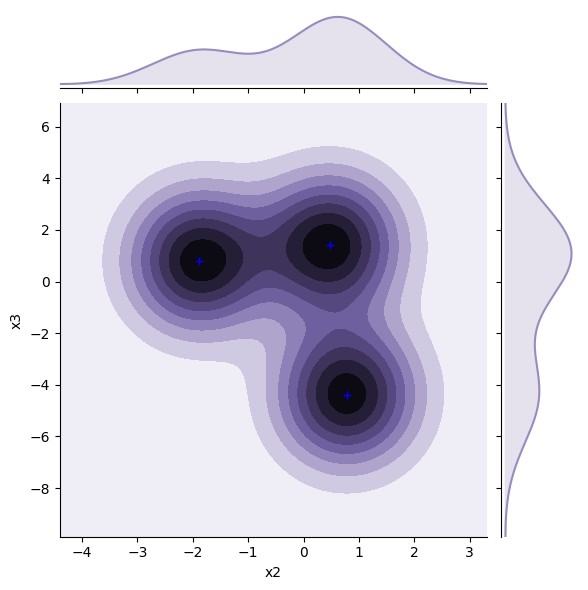

In [33]:
# 两个特征值的联合后验
fig = plt.figure(figsize=(4, 3))
trace_beta2 = trace_2b['beta2'][burnin:]
trace_beta3 = trace_2b['beta3'][burnin:]
# trace_beta2 = np.loadtxt('trace_beta2.csv',delimiter = ',')
# trace_beta3 = np.loadtxt('trace_beta3.csv',delimiter = ',')
# datamap = np.vstack((trace_beta2[:, 1], trace_beta3[:,1]))
datamap = np.vstack((trace_beta2[1], trace_beta3[1]))
df = pd.DataFrame(datamap.transpose(), columns=["x2", "x3"])
g = sns.jointplot(x="x2", y="x3", data=df, kind="kde", color="#988CBE", stat_func=None, xlime=(-2,2), ylime=(-2,2))
g.plot_joint(plt.scatter, c="b", s=40, linewidth=1, marker="+")
plt.show()

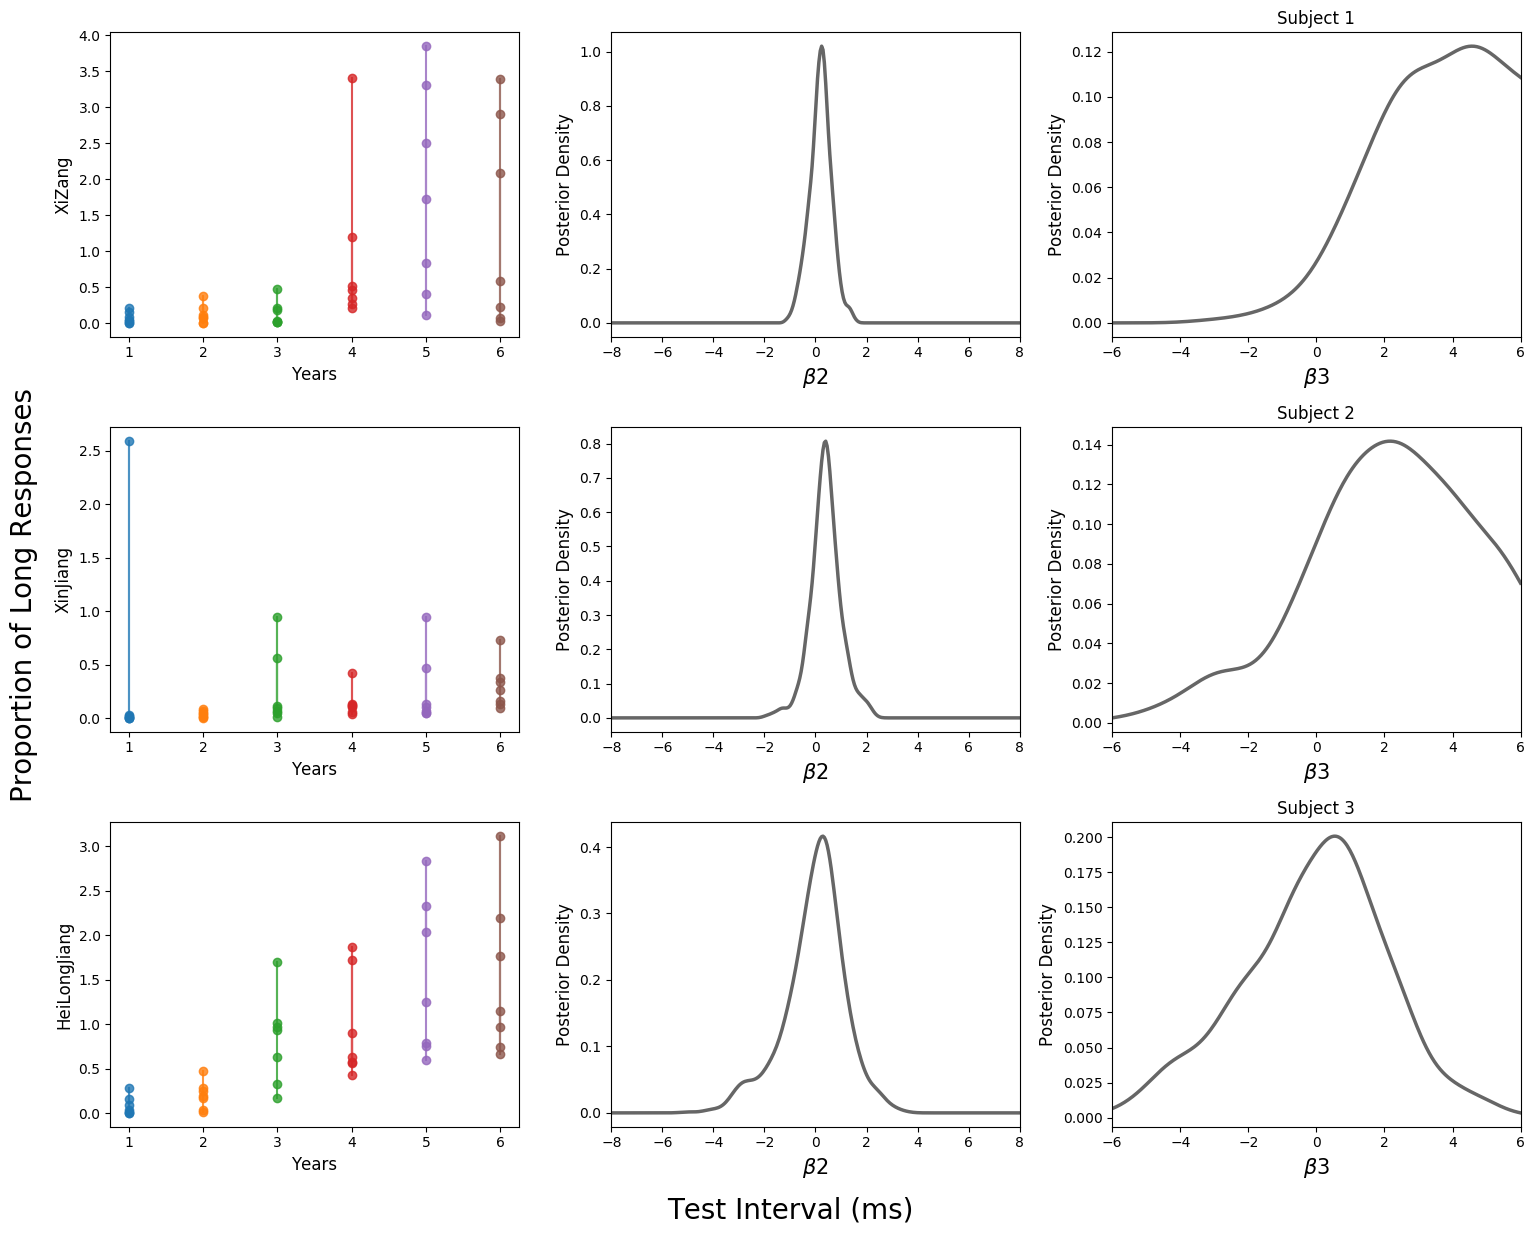

In [19]:
# 跟随特征变化分析
from scipy.stats.kde import gaussian_kde
burnin = 2000
kde_beta2 = trace_2b['beta2'][burnin:]
kde_beta3 = trace_2b['beta3'][burnin:]

fig = plt.figure(figsize=(15, 12))
fig.text(0.5, -0.02, 'Test Interval (ms)', ha='center', fontsize=20)
fig.text(-0.02, 0.5, 'Proportion of Long Responses', va='center', rotation='vertical', fontsize=20)
gs = gridspec.GridSpec(3, 3)
ppcsamples = 100
burnin = 2000

ylabes = ['XiZang', 'XinJiang', 'HeiLongJiang']

for ip in np.arange(companiesABC):
    ax0 = plt.subplot(gs[ip*3])
    xp = elec_year2[ip*7:(ip+1)*7, :]
    yp = elec_faults2[ip*7:(ip+1)*7, :]
    ax0.plot(xp, yp, marker='o', alpha=.8)
    plt.ylabel(ylabes[ip], fontsize=12)
    plt.xlabel('Years' , fontsize=12)
    
    x0 = np.linspace(0.5, 6, 6)
    y0 = np.exp(uMAP + betaMAP + beta1MAP[ip]*xl + beta2MAP[ip]*elec_Pca_char1[ip*42:(ip*42+6)] + \
                beta3MAP[ip]*elec_Pca_char2[ip*42:(ip*42+6)] ++ beta4MAP[ip]*xl*xl)
    
    # Posterior sample from the trace
#     for ips in np.random.randint(burnin, 3000, ppcsamples):
#         param = trace[ips]
#         yl2 = np.exp(param['beta'][ip] + param['beta1'][ip] * (xl) + param['beta2'][ip]*elec_Pca_char1[ip*42:(ip*42+40)] + \
#                      param['beta3'][ip]*elec_Pca_char2[ip*42:(ip*42+40)])
#         ax0.plot(xl, yl2, 'k', linewidth=2, alpha=.05)
    
    ax1 = plt.subplot(gs[1+ip*3])
    my_pdf1 = gaussian_kde(kde_beta2[:, ip])
    x1 = np.linspace(-8, 8, 300)
    ax1.plot(x1, my_pdf1(x1), 'k', lw=2.5, alpha=0.6)
    plt.xlim((-8, 8))
    plt.xlabel(r'$\beta2$', fontsize=15)
    plt.ylabel('Posterior Density', fontsize=12)
    
    ax2 = plt.subplot(gs[2+ip*3])
    my_pdf2 = gaussian_kde(kde_beta3[:, ip])
    x2 = np.linspace(-6, 6, 300)
    ax2.plot(x2, my_pdf2(x2), 'k', lw=2.5, alpha=0.6)
    plt.xlim((-6, 6))
    plt.xlabel(r'$\beta3$', fontsize=15)
    plt.ylabel('Posterior Density', fontsize=12)
    plt.title('Subject %s' % (ip + 1))
    
plt.tight_layout()
plt.show()

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2522.11it/s]


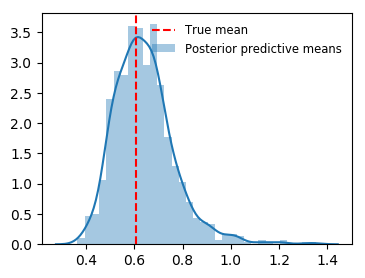

In [20]:
# 后验分析
ppc = pm.sample_ppc(trace_2b, samples=1000, model=model_2b)
yipred = ppc['Observed']
# plt.hist(yipred, normed=1, bins=80, alpha=.8, label='Posterior')
# plt.show()
plt.figure(figsize=(4, 3))
ax = sns.distplot(ppc['Observed'].mean(axis=1), label='Posterior predictive means') # axis=1以行方式计算
ax.axvline(elec_faults.mean(), color='r', ls='--', label='True mean')
ax.legend(frameon=False, fontsize='small')

plt.show()
# np.savetxt('ppcObserved_mean.csv',ppc['Observed'].mean(axis=1) , delimiter=',')
# plt.savefig('Picture/3.svg', format='svg')

In [21]:
# 第七年数据测试，读取测试数据集特征,
data_cs = pd.read_csv('XZ_CS.csv')
SNR_cs = np.random.normal(0, 2, size=[len(data_cs.Tem.values), 4])
datax_cs = np.array(data_cs)[:,0:4] + SNR_cs # 添加噪声

data_cs_year = data_cs.Year.values # 测试数据时间
data_cs_num  = data_cs.Count.values # 测试数据参考位置,这么做就是整数

meanVal = np.mean(datax_cs, axis=0)  # 按列求均值，即求各个特征的均值
newData_mean = datax_cs - meanVal
StdVal  = np.std(datax_cs, axis=0)
newData_std = newData_mean/StdVal


pca = PCA(n_components=2)
pca.fit(newData_std)
Pca_cs = pca.transform(newData_std) # 测试数据PCA特征值，直接调用即可，但是之调用这条也会出问题
Pca_cs_char1 = Pca_cs[:, 0]
Pca_cs_char2 = Pca_cs[:, 1]
print(data_cs_year)
print(data_cs_num)
# print(Pca_cs)

# print(pm.waic(trace, model1))

[1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2
 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4
 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6
 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


100%|████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3499.44it/s]


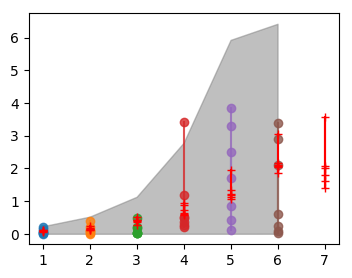

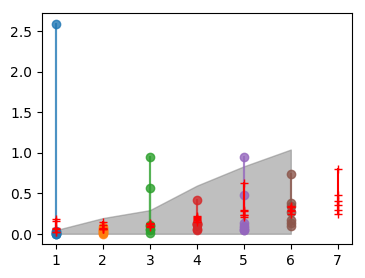

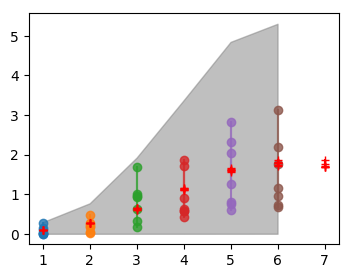

In [49]:
# 测试数据结果显示
# print(data_cs_year)
xs_year.set_value(np.asarray(data_cs_year))
Num_shared.set_value(np.asarray(data_cs_num))
xs_char1.set_value(np.asarray(Pca_cs_char1))
xs_char2.set_value(np.asarray(Pca_cs_char2))

with model_2b:
    ppcc = pm.sample_ppc(trace_2b)
post_pred = ppcc['Observed']
yipred_mean = post_pred.mean(axis=0)
# print(yipred_mean)
# idx = data_cs_year # 这句话要改
sig0 = pm.hpd(post_pred, alpha=0.05)
# plt.fill_between(xp, sig0[:,0], sig01[:,1], color='gray', alpha=.8)  
# print(sig0)
# 预测，此时这种格式是每行列数len(elec_faults)个，有很多行数据
xipred={}

fig = plt.figure(figsize=(4, 3))
# fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
ip = 0
xp = elec_year2[ip * 7:(ip + 1) * 7, :]  # 原始数据
yp = elec_faults2[ip * 7:(ip + 1) * 7, :]
ax.plot(xp, yp, marker='o', alpha=.8)

plt.fill_between(xp[0], sig0[:6,0], sig0[:6,1], color='gray', alpha=.5) 

yipred_yplot = np.array([yipred_mean[i*7:(i+1)*7] for i in np.arange(6*ip, (ip+1)*6)])
xipred = np.array([np.arange(7)+1 for i in np.arange(6)])
ax.plot(xipred, yipred_yplot[:], 'k+-', color='r')  
# plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\SCI\\Picture\\Pred0.png', dpi = 200, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
ip = 1
xp = elec_year2[ip * 7:(ip + 1) * 7, :]  # 原始数据
yp = elec_faults2[ip * 7:(ip + 1) * 7, :]
ax.plot(xp, yp, marker='o', alpha=.8)

plt.fill_between(xp[0], sig0[42:48,0], sig0[42:48,1], color='gray', alpha=.5) 

yipred_yplot = np.array([yipred_mean[i*7:(i+1)*7] for i in np.arange(6*ip, (ip+1)*6)])
xipred = np.array([np.arange(7)+1 for i in np.arange(6)])
ax.plot(xipred, yipred_yplot[:], 'k+-', color='r') 
# plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\SCI\\Picture\\Pred1.png', dpi = 200, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
ip = 2
xp = elec_year2[ip * 7:(ip + 1) * 7, :]  # 原始数据
yp = elec_faults2[ip * 7:(ip + 1) * 7, :]
ax.plot(xp, yp, marker='o', alpha=.8)

plt.fill_between(xp[0], sig0[84:90,0], sig0[84:90,1], color='gray', alpha=.5)  

yipred_yplot = np.array([yipred_mean[i*7:(i+1)*7] for i in np.arange(6*ip, (ip+1)*6)])
xipred = np.array([np.arange(7)+1 for i in np.arange(6)])
ax.plot(xipred, yipred_yplot[:], 'k+-', color='r')

# plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\SCI\\Picture\\Pred2.png', dpi = 200, bbox_inches='tight')
plt.show()

In [44]:
# 应用偏最小二乘PLS来进行仿真
from sklearn.cross_decomposition import PLSRegression
X_PLSR = np.vstack((elec_year, elec_tem, elec_hPa, elec_RH, elec_Lux)).T   # 特征数据合并为一个数组
X_PLSR_XZ = X_PLSR[:42, :]
X_PLSR_XJ = X_PLSR[42:84, :]
X_PLSR_HLJ = X_PLSR[84:, :]
# X_PLSR_HLJ[:5, 0]=7
# print(X_PLSR_HLJ)
Y_PLSR = elec_faults
Y_PLSR_XZ = Y_PLSR[:42]
Y_PLSR_XJ = Y_PLSR[42:84]
Y_PLSR_HLJ = Y_PLSR[84:]
# print(Y_PLSR_XZ)


pls_XZ = PLSRegression(n_components=3)
pls_XZ.fit(X_PLSR_XZ, Y_PLSR_XZ)
# X_train_r, Y_train_r = pls_XZ.transform(X_PLSR_XZ, Y_PLSR_XZ)
# PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)
Y_PLSpred_XZ = pls_XZ.predict(X_PLSR_XZ)
Y_PLSpred_XZ =  np.vstack((Y_PLSpred_XZ).T)[0]
# print(X_train_r)
# print(Y_PLSpred_XZ)

pls_XJ = PLSRegression(n_components=3)
pls_XJ.fit(X_PLSR_XJ, Y_PLSR_XJ)
# X_train_r, Y_train_r = pls_XZ.transform(X_PLSR_XZ, Y_PLSR_XZ)
# PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)
Y_PLSpred_XJ = pls_XJ.predict(X_PLSR_XJ)
Y_PLSpred_XJ =  np.vstack((Y_PLSpred_XJ).T)[0]
# print(X_train_r)
# print(Y_PLSpred_XJ)


pls_HLJ = PLSRegression(n_components=3)
pls_HLJ.fit(X_PLSR_HLJ, Y_PLSR_HLJ)
# X_train_r, Y_train_r = pls_XZ.transform(X_PLSR_HLJ, Y_PLSR_HLJ)
# PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)
Y_PLSpred_HLJ = pls_HLJ.predict(X_PLSR_HLJ)
Y_PLSpred_HLJ =  np.vstack((Y_PLSpred_HLJ).T)[0]
# print(Y_PLSpred_HLJ)
# print(Y_train_r)

Y_PLSpred = np.vstack((Y_PLSpred_XZ, Y_PLSpred_XJ, Y_PLSpred_HLJ))# Pls预测值
Y_PLSpred_Target = np.vstack((Y_PLSR_XZ, Y_PLSR_XJ, Y_PLSR_HLJ)) # 目标值
# print(Y_PLSpred)
print(Y_PLSpred[0])

aaa = pls_HLJ.get_params(deep=True) # 获取参数
print(aaa)

[ 0.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.
  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.
  0.  0.  0.  1.  1.  1.]
{'copy': True, 'max_iter': 500, 'n_components': 3, 'scale': True, 'tol': 1e-06}


In [45]:
# 将预测值转化为均值形式
AAA = np.array([Y_PLSpred_XZ[i*6:(i+1)*6] for i in np.arange(7)])
BBB = np.array([Y_PLSpred_XJ[i*6:(i+1)*6] for i in np.arange(7)])
CCC = np.array([Y_PLSpred_HLJ[i*6:(i+1)*6] for i in np.arange(7)])
XZ_mean = AAA[:].mean(axis=0)
XJ_mean = BBB[:].mean(axis=0)
HLJ_mean = CCC[:].mean(axis=0)
Y_PLSpred_MEAN = np.vstack((XZ_mean, XJ_mean, HLJ_mean))# Pls预测值
# print(XZ_mean)
# print(HLJ_mean)
print(Y_PLSpred)
print('\n')
# 计算MSE 时用均值计算
for i in np.arange(7):
    Y_PLSpred[0,i*6:(i+1)*6] = XZ_mean
    Y_PLSpred[1,i*6:(i+1)*6] = XJ_mean
    Y_PLSpred[2,i*6:(i+1)*6] = HLJ_mean
print(Y_PLSpred)

[[ 0.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.
   0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.
   0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
   0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.
   0.  1.  1.  1.  1.  1.]]


[[ 0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.
   0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.
   0.  0.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
   0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1

In [46]:
# 计算均方误差
def Rmse(predictions, targets):
    return  np.sqrt(np.mean((predictions - targets)**2))

rmse = {}
for ip in np.arange(3):
    rmse[ip] = Rmse(Y_PLSpred_Target[ip, :]/100, Y_PLSpred[ip, :]/100)

print(rmse)
y22 = np.zeros((21, 6))
y22_1 = np.zeros((21, 6))
for ip in np.arange(3):
    for i in np.arange(7):
            y22[(ip*6 + i), :] = np.exp(uMAP2 + betaMAP2 + (beta1MAP2[ip]*xl + beta2MAP2[ip]*elec_Pca_char1[(ip*42+i*6):(ip*42+6*(i+1))] + \
                        beta3MAP2[ip]*elec_Pca_char2[(ip*42+i*6):(ip*42+6*(i+1))] + beta4MAP2[ip]*xl*xl)) 
            y22_1[(ip*6 + i), :] = np.exp(uMAP + betaMAP + (beta1MAP[ip]*xl + beta2MAP[ip]*elec_Pca_char1[(ip*42+i*6):(ip*42+6*(i+1))] + \
                        beta3MAP[ip]*elec_Pca_char2[(ip*42+i*6):(ip*42+6*(i+1))] + beta4MAP[ip]*xl*xl)) 

a,a1,a2 =  np.array([]),np.array([]),np.array([])
global b_faults
b_faults = Y_PLSpred
a_1,a1_1,a2_1 =  np.array([]),np.array([]),np.array([])
global b_faults_1
b_faults_1 = Y_PLSpred

for i in np.arange(7):
    a = np.append(a, y22[i])
    a1 = np.append(a1, y22[i+7])
    a2 = np.append(a2, y22[i+14])
    
    a_1 = np.append(a_1, y22_1[i])
    a1_1 = np.append(a1_1, y22_1[i+7])
    a2_1 = np.append(a2_1, y22_1[i+14])
b_faults = np.vstack((a, a1, a2))
b_faults_1 = np.vstack((a_1, a1_1, a2_1))

rmse2 = {}
rmse2_1 = {}
elec_fa = np.array([elec_faults[i*42:(i+1)*42] for i in np.arange(3)])
# print(elec_fa)
# 模型2 的均方误差值
 
for ip in np.arange(3):
    rmse2[ip] = Rmse(b_faults[ip, :]/100, elec_fa[ip, :]/100)
    rmse2_1[ip] = Rmse(b_faults_1[ip, :]/100, elec_fa[ip, :]/100)
print('Model_1: ', rmse2_1)
print('Model2: ', rmse2)



{0: 0.0096523980517409375, 1: 0.0043327423865254823, 2: 0.0062456977770211112}
Model_1:  {0: 0.011602470076666664, 1: 0.0056534040561156016, 2: 0.010121286200567101}
Model2:  {0: 0.011507753997558802, 1: 0.0061806526464101529, 2: 0.01004292115264383}


In [26]:
# 将预测值转化为均值形式
AAA = np.array([Y_PLSpred_XZ[i*6:(i+1)*6] for i in np.arange(7)])
BBB = np.array([Y_PLSpred_XJ[i*6:(i+1)*6] for i in np.arange(7)])
CCC = np.array([Y_PLSpred_HLJ[i*6:(i+1)*6] for i in np.arange(7)])
XZ_mean = AAA[:].mean(axis=0)
XJ_mean = BBB[:].mean(axis=0)
HLJ_mean = CCC[:].mean(axis=0)
Y_PLSpred_MEAN = np.vstack((XZ_mean, XJ_mean, HLJ_mean))# Pls预测值
print(Y_PLSpred_MEAN)
# print(HLJ_mean)

[[ 0.  0.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.]]


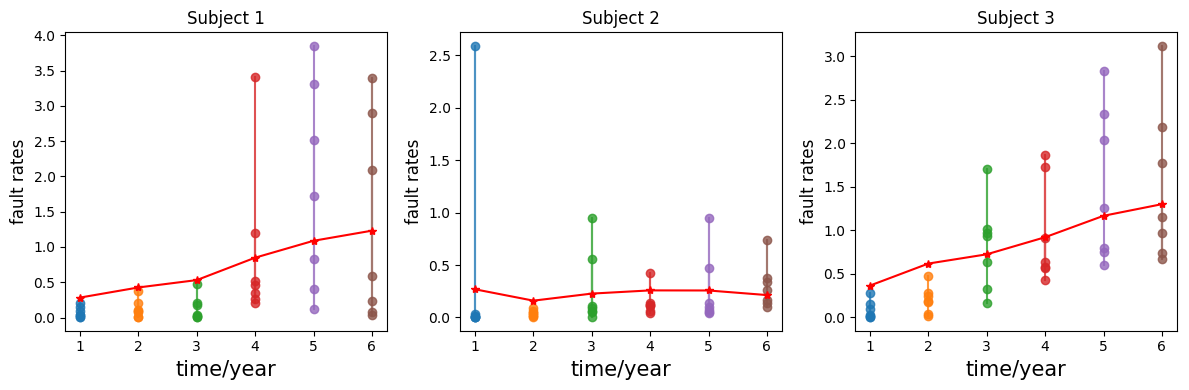

In [27]:
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3)
xipred = np.array(np.arange(6) + 1)

for ip in np.arange(3):
    ax = plt.subplot(gs[ip])
    xp = elec_year2[ip * 7:(ip + 1) * 7, :]  # 原始数据
    yp = elec_faults2[ip * 7:(ip + 1) * 7, :]
    ax.plot(xp, yp, marker='o', alpha=.8)

    yipred_yplot = np.array(Y_PLSpred_MEAN[ip])

    ax.plot(xipred, yipred_yplot, 'k*-', color='r')
    plt.xlabel('time/year', fontsize=15)
    plt.ylabel('fault rates', fontsize=12)
    plt.title('Subject %s' % (ip + 1))

plt.tight_layout()
plt.show()